In [32]:
import numpy as np

def cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=0, start_warmup_value=0):
    warmup_schedule = np.array([])
    warmup_iters = warmup_epochs * niter_per_ep
    if warmup_epochs > 0:
        warmup_schedule = np.linspace(start_warmup_value, base_value, warmup_iters)

    iters = np.arange(epochs * niter_per_ep - warmup_iters)
    schedule = final_value + 0.5 * (base_value - final_value) * (1 + np.cos(np.pi * iters / len(iters)))

    schedule = np.concatenate((warmup_schedule, schedule))
    assert len(schedule) == epochs * niter_per_ep
    return schedule

base_value = 0.0005 * 512 / 256
final_value = 0.00001
epochs = 100
niter_per_ep = 1281167
warmup_epochs = 10
start_warmup_value = 0
schedule = cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=warmup_epochs, start_warmup_value=start_warmup_value)

for epoch in range(10):

    print(epoch, schedule[epoch*niter_per_ep])

0 0.0
1 0.0001000000078053843
2 0.0002000000156107686
3 0.0003000000234161529
4 0.0004000000312215372
5 0.0005000000390269215
6 0.0006000000468323058
7 0.0007000000546376901
8 0.0008000000624430744
9 0.0009000000702484586


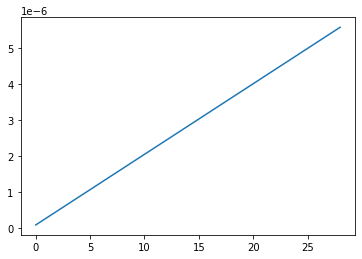

In [26]:
import json
import matplotlib.pyplot as plt

train_lr_list = []
with open('/storage/yue/dino_models/log.txt') as f:
    lines = f.readlines()
    for line in lines:
        train_lr_list.append(float(json.loads(line.split('\n')[0])['train_lr']))
fig, ax = plt.subplots()
ax.plot(range(len(train_lr_list)), train_lr_list)

In [21]:
train_lr_list


[9.760633060376441e-08,
 2.9289704565423905e-07,
 4.88187760704714e-07,
 6.834784757551886e-07,
 8.787691908056631e-07,
 1.0740599058561379e-06,
 1.2693506209066127e-06,
 1.4646413359570876e-06,
 1.6599320510075613e-06,
 1.8552227660580368e-06,
 2.050513481108512e-06,
 2.245804196158986e-06,
 2.44109491120946e-06,
 2.636385626259935e-06,
 2.831676341310411e-06,
 3.0269670563608834e-06,
 3.2222577714113584e-06,
 3.4175484864618344e-06,
 3.612839201512307e-06,
 3.8081299165627866e-06,
 4.003420631613257e-06,
 4.198711346663736e-06,
 4.39400206171421e-06,
 4.589292776764684e-06,
 4.78458349181516e-06,
 4.979874206865629e-06,
 5.175164921916102e-06,
 5.37045563696658e-06,
 5.565746352017056e-06]

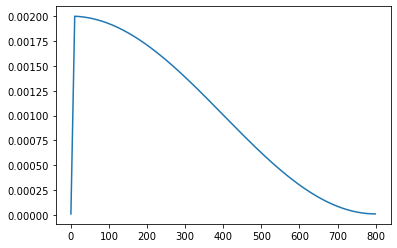

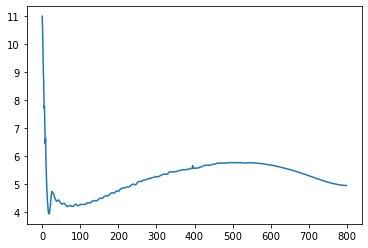

In [33]:
train_lr_list = []
with open('/storage/yue/dino_models/dino_deitsmall16_pretrain_log.txt') as f:
    lines = f.readlines()
    for line in lines:
        train_lr_list.append(float(json.loads(line.split('\n')[0])['train_lr']))
fig, ax = plt.subplots()
ax.plot(range(len(train_lr_list)), train_lr_list)

train_lr_list = []
with open('/storage/yue/dino_models/dino_deitsmall16_pretrain_log.txt') as f:
    lines = f.readlines()
    for line in lines:
        train_lr_list.append(float(json.loads(line.split('\n')[0])['train_loss']))
fig, ax = plt.subplots()
ax.plot(range(len(train_lr_list)), train_lr_list)